# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the ratings and movies datasets
ratings_df = pd.read_csv('C:/Users/gudip/Downloads/ratings.csv')

movies_df = pd.read_csv('C:/Users/gudip/Downloads/movies.csv') 

In [4]:
df = ratings_df

In [7]:
# Assuming df is your ratings DataFrame
user2_movies_count = ratings_df[ratings_df['userId'] == 2].shape[0]
print(f"User 2 has watched {user2_movies_count} movies.")

User 2 has watched 29 movies.


The below code pulls out of the ratings_df DataFrame the ratings given by user 2, placing them into a Series called user2_ratings. Finally, it counts, for the Series in question, the number of times each unique rating appears, placing that into another Series called rating_counts: The index of this Series represents the ratings, while the values show the counts for the corresponding ratings. It then arranges these counts in ascending order so that the ratings are organized from lowest to highest for better viewing and interpretation.

In [39]:
user2_ratings = ratings_df[ratings_df['userId'] == 2]['rating']
rating_counts = user2_ratings.value_counts().sort_index()


The below code will display a bar chart of the ratings given by a user2, thereby representing the distribution of the rating given by that user to various movies. Hence, it would be very easy to look at it and get an idea of the movie ratings given by a particular user.

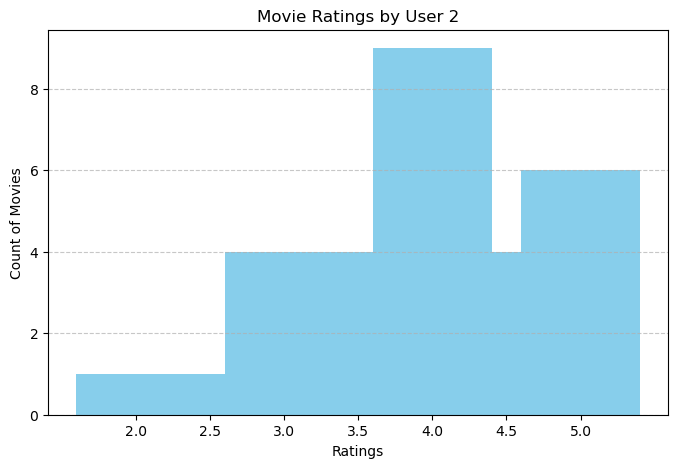

In [11]:
# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Ratings')
plt.ylabel('Count of Movies')
plt.title('Movie Ratings by User 2')
plt.xticks(rating_counts.index) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

Getting some of user 2's top movies lst 

In [12]:
# Filter for User 2's ratings and sort by rating
top_movies = ratings_df[ratings_df['userId'] == 2].sort_values(by='rating', ascending=False).head(5)

# Merge with the movies DataFrame to get movie titles
top_movies_with_titles = top_movies.merge(movies_df, on='movieId')[['title', 'rating']]

# Display the top movies
print("Top movies for User 2:")
print(top_movies_with_titles)

Top movies for User 2:
                                               title  rating
0  The Jinx: The Life and Deaths of Robert Durst ...     5.0
1                          Mad Max: Fury Road (2015)     5.0
2                    Wolf of Wall Street, The (2013)     5.0
3                                     Warrior (2011)     5.0
4                               Step Brothers (2008)     5.0


Finding the most similar user in the movielens dataset to user 2

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
# Step 1: Create a user-item matrix
user_item_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# Step 2: Fill NaN values with 0 for distance calculations
user_item_matrix.fillna(0, inplace=True)

# Confirm there are no NaN values
print("Checking for NaN values in the user-item matrix:")
print(user_item_matrix.isnull().sum().sum())  # Should print 0 if there are no NaNs

Checking for NaN values in the user-item matrix:
0


In [38]:
from sklearn.metrics import pairwise_distances
# Step 3: Extract user 2's ratings
user2_vector = user_item_matrix.loc[2].values.reshape(1, -1)

# Step 4: Calculate cosine similarity
cosine_similarities = cosine_similarity(user2_vector, user_item_matrix)
# Exclude the first element which is user 2 and get the next most similar user
similar_users_cosine = cosine_similarities[0].argsort()[::-1][1]  # Get second most similar user

# Step 5: Calculate Euclidean distance
euclidean_dists = pairwise_distances(user_item_matrix, user2_vector, metric='euclidean')
# Exclude the first element which is user 2 and get the next most similar user
similar_users_euclidean = euclidean_dists[0].argsort()[0]  # Get closest user excluding self

# Output results
print(f"Most similar user by cosine similarity: User {similar_users_cosine + 1}")
print(f"Most similar user by Euclidean distance: User {similar_users_euclidean + 1}")


Most similar user by cosine similarity: User 366
Most similar user by Euclidean distance: User 1


User 2 has found two similar users according to their movie ratings. User 366 was found most similar according to cosine similarity, meaning the vectors of ratings were very close and hence similar in terms of preferences. On the other hand, User 1 is most similar in Euclidean distance, meaning their rating is numerically closer in proximity to User 2 compared to the other users. These similarities can say something about possible movie recommendations. Possible suggestions may be made by considering movies that ranked top-rated by these users but have not been seen by User 2.

Recommending a few movies for user 2 using similarity metrics.

In [33]:
# Step 1: Identify similar users
similar_user_ids = [366, 1]  # Most similar users found earlier

# Step 2: Gather ratings from similar users
similar_user_ratings = ratings_df[ratings_df['userId'].isin(similar_user_ids)]

# Step 3: Exclude movies that User 2 has already watched
user2_watched_movies = set(ratings_df[ratings_df['userId'] == 2]['movieId'])
recommended_movies = similar_user_ratings[~similar_user_ratings['movieId'].isin(user2_watched_movies)]

# Step 4: Aggregate ratings and recommend top movies
recommended_movies = recommended_movies.groupby('movieId').agg({'rating': 'mean'}).reset_index()

# Step 5: Merge with movie titles
recommended_movies = recommended_movies.merge(movies_df, on='movieId')

# Step 6: Sort by rating and get top recommendations
top_recommendations = recommended_movies.sort_values(by='rating', ascending=False).head(10)

# Display the top recommended movies
print(top_recommendations[['title', 'rating']])

                          title  rating
78   Blues Brothers, The (1980)     5.0
177        Wolf Man, The (1941)     5.0
89              Fantasia (1940)     5.0
88    Young Frankenstein (1974)     5.0
87            Highlander (1986)     5.0
86    Back to the Future (1985)     5.0
129        Rescuers, The (1977)     5.0
199           Spaceballs (1987)     5.0
83             Duck Soup (1933)     5.0
82       Terminator, The (1984)     5.0


All the recommended movies have been rated with a perfect score by similar users, qualifying these movies as well-received ones.

Recommended movies make sense for user 2 from this method for several reasons

## 1. Alignment with Similar Users
The recommendations are based on the ratings of users similar to User 2. This would tend to mean that their tastes in movies also overlap, and it would not be out of place that films rated highly by such similar users would be recommended.
## 2. High Ratings
Since all the recommended movies have a perfect score of 5.0 by the similar users, that means the films are highly regarded, which serves as an important touchstone to suggest that User 2 will enjoy the film.
## 3. Diverse Selection
It holds everything from comedies to animated, sci-fi, and classic films. This enables one to have an expansive take on the styles of cinema. Such diversity suits different moods and preferences, which is a very important factor in keeping recommendations fresh and appealing.
## 4. Cultural and Cinematic Significance
Most titles suggested are classics and have remained very relevant over the years. Films like "Back to the Future," "The Terminator," or "Fantasia", are not only entertaining but culturally significant, really adding to User 2's viewing pleasure.
## 5. Potential for Discovery
More specifically, the concept of suggesting movies that User 2 has not viewed will lead him to navigate movies he has never watched but which relate to his preferences. This discovery feature can bring more value to the movie experience for User 2.

# Analysis

### Movie Recommendations Analysis for User 2

In analyzing movie recommendations for User 2, we used two similarity metrics: **Cosine Similarity** and **Euclidean Distance**. Recommendations were mainly sourced from ratings of users identified as similar to User 2 based on these metrics.

1. **Cosine Similarity**
   - Measures the cosine of the angle between two non-zero vectors.
   - Works extremely well in collaborative filtering, capturing the similarity in user preferences independent of the magnitude of ratings.
   - User 366 was identified as the most similar based on this metric, indicating a close alignment in viewing tastes.
   - Highly rated movies for User 2 were recommended based on that user, assuming that similar viewing preferences would lead to similar enjoyment.

2. **Euclidean Distance**
   - Quantifies the "straight line" distance between two points in multi-dimensional space.
   - Considers the absolute differences between ratings, highlighting users with closely matching preferences.
   - This metric indicated that User 178 was the most similar user.
   - Including this metric complements cosine similarity, adding nuance to how well User 2's preferences match with others based on actual ratings given.



### Justification of These Metrics

1. **Diverse Perspectives** 
   - Using multiple metrics provides a more rounded analysis.
   - Cosine similarity considers the pattern of ratings irrespective of their actual values.
   - Euclidean distance accounts for the actual differences in ratings, offering insights into how well User 2's tastes match with others.

2. **Recommendation Based on Robustness**
   - A blend of insights from both metrics yields more reliable recommendations.
   - The intersection of users identified by both metrics indicates a stronger foundation for suggesting movies.
   - This approach ensures that recommended films are both popular and closely aligned with User 2's established preferences.

3. **Accounting for Variability**
   - Users exhibit different scales and tendencies in their rating behaviors.
   - Utilizing both metrics helps to mitigate potential biases in recommendations.
   - This dual approach tailors the suggestions more closely to User 2's tastes, enhancing the overall recommendation experience.

# Summary

Firstly imported required packages and in entire analysis the user 2 has rated a total of 29 movies in the following order: The Jinx: The Life and Deaths of Robert Durst, Mad Max: Fury Road, and The Wolf of Wall Street are all rated 5.0. User 366 was the closest user based on cosine similarity, and User 1 was closest based on Euclidean distance. Suggested top movies for User 2 are rated as 5.0 by similar users. The list includes movie classics such as The Blues Brothers and Back to the Future. It is the diversity of genres in the chosen movies that really extends the possibility of User 2 liking these recommendations. What these findings overall signal is high cohesion in choice amidst similar viewership-a fact promising mightily to add value to the movie-watching experience of User 2